# Clustering

- In this Notebook, Clustering has been applied to the dataset for parking penalties in London.
  
- The clustering techniques that are used are 
  - K-Means
  - K-Modes
  - K Prototype

The dataset has 7 default features and 1 newly added feature for date to divide the dates in to quarters. 

 ### Columns             

 0   Make                 
 1   Colour            
 2   Issue Time           
 3   Contravention Code  
 4   Location             
 5   PA_Details          
 6   Issue Date    


 All these features are in string format. In the below segments, we would separate Numerical features from categorical features and apply clustering techniques on subsets of data. 

  - K-Means
  
            For Numerical feature - ***Issue Time*** we will apply K-Means algorithm to find potential groups on the basis of similarities in the feature


  - K-Modes
  
            For Categorical features - ***Make,	Colour,	Location, Issue Date, Contravention Code and PA_Details*** we will apply K-Modes algorithm to find potential groups on the basis of similarities between these features. As K-means only work for Numerical features. 



  - K Prototype

            To analyse the whole dataset, we will use K-Prototype algorithm. K-Prototype is used when the dataset has both categorical and Numerical features, that we have in our dataset.

### Importing Libraries

In [65]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
warnings.simplefilter("ignore")


### Loading Dataset

In [66]:
## Load Dataset
df = pd.read_csv('Project Parking.csv')
df.shape


(380639, 8)

In [67]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
0,0,NaN,0:15,1,North Crescent,1485,2019-01-01,0.25
1,0,NaN,0:19,16,Anne Street,1456,2019-01-01,0.32
2,0,NaN,0:19,25,Celebration Avenue,1252,2019-01-01,0.32
3,0,NaN,0:20,01o,Honour Lea Avenue,1313,2019-01-01,0.33
4,0,NaN,0:22,62,Warton Road,1456,2019-01-01,0.37


## Data Preprocessing

As the data is not in correct format, we will clean the data by removing unwanted and test records. Also date has been changed to correct format and Numerical features are also converted from strings to numerical format. 



### Dates
- Dates have been divided into quarters manually for better clustering results.

In [68]:
# Applying the condition
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-01')] = 'Q1'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-02')] = 'Q1'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-03')] = 'Q1'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-04')] = 'Q2'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-05')] = 'Q2'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-06')] = 'Q2'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-07')] = 'Q3'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-08')] = 'Q3'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-09')] = 'Q3'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-10')] = 'Q4'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-11')] = 'Q4'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-12')] = 'Q4'

df['Issue Date'].loc[df['Issue Date'].str.contains('2020-01')] = 'Q5'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-02')] = 'Q5'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-03')] = 'Q5'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-04')] = 'Q6'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-05')] = 'Q6'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-06')] = 'Q6'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-07')] = 'Q7'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-08')] = 'Q7'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-09')] = 'Q7'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-10')] = 'Q8'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-11')] = 'Q8'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-12')] = 'Q8'

df['Issue Date'].loc[df['Issue Date'].str.contains('2021-01')] = 'Q9'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-02')] = 'Q9'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-03')] = 'Q9'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-04')] = 'Q10'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-05')] = 'Q10'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-06')] = 'Q10'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-07')] = 'Q11'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-08')] = 'Q11'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-09')] = 'Q11'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-10')] = 'Q12'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-11')] = 'Q12'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-12')] = 'Q12'

In [69]:
df['Issue Date'].unique()

array(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12'], dtype=object)

### Issue Time
- Time has been converted in to a decimal format to deal it as a Numeric Feature. 
  
#### Steps of conversion in the excel file: 
1. Multiplied the time with 60
2. Change format from time to Number


12:15 = 12.25

19:30 = 19.5

01:45 = 01.75

In [70]:
df['Issue Time Decimal']


0          0.25
1          0.32
2          0.32
3          0.33
4          0.37
          ...  
380634    15.52
380635    16.42
380636    16.50
380637    17.07
380638    17.13
Name: Issue Time Decimal, Length: 380639, dtype: float64

In [71]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
0,0,NaN,0:15,1,North Crescent,1485,Q1,0.25
1,0,NaN,0:19,16,Anne Street,1456,Q1,0.32
2,0,NaN,0:19,25,Celebration Avenue,1252,Q1,0.32
3,0,NaN,0:20,01o,Honour Lea Avenue,1313,Q1,0.33
4,0,NaN,0:22,62,Warton Road,1456,Q1,0.37


### Contravention Code

In [72]:
df['Contravention Code'].unique().shape

(136,)

In [73]:
df['Contravention Code'].unique()

array(['1', '16', '25', '01o', '62', '40', '165', '99', '14', 'W23',
       'W01', 'W61', 'W63', '21', '12', '19', '01a', '6', '27', '11u',
       '30', '54', '26', '73u', '82u)', '01o)', '2', '83', '73', '165)',
       '45', '11u)', '47', '80', '92', '87', '28', '48', '5', 'W12', '91',
       '62g', '82', '23g', '86', 'W02', '05u', '23c', '11', '85', '82u',
       '95', '8', '35', 'W62', '22', '10', '62g)', '80u', 'W27', 'W87',
       '61', 'W21', '71', 'W26', 'W11', '81', 'W06', '49', '23', '20',
       'W57', 'W19', 'W45', 'W47', '55', 'W01A', 'W25', 'W20', 'W93',
       '24', 'W24', '43', '70', '23r', 'W41', 'W04', '9', 'W16', 'W05',
       'W30', 'W92', '61g)', 'W48', 'W14', 'W73', 'W91', 'W31', 'W49',
       '96', '56', 'W95', 'W46', '23s', 'W40', 'W99', '18', '4', '63',
       'W82', 'W22', '73u)', 'W89', '61g', 'W09', 'W83', 'W08', '23e',
       '164', 'W35', '23d', '93', 'W70', 'W55', 'W56', '7', '89', '232',
       '23p', '5u)', 'W42', 'W10', '36', 'W54', '57', 'W90'], dtype=

- Dropping Contravention codes which contains 'W'

In [74]:
df = df[~df['Contravention Code'].str.contains('W')]

In [75]:
# df['Contravention Code']=df['Contravention Code'].str.replace("u","")
# df['Contravention Code']=df['Contravention Code'].str.replace("g","")
# df['Contravention Code']=df['Contravention Code'].str.replace("a","")
# df['Contravention Code']=df['Contravention Code'].str.replace("c","")
# df['Contravention Code']=df['Contravention Code'].str.replace("o","")
# df['Contravention Code']=df['Contravention Code'].str.replace(")","")
# df['Contravention Code']=df['Contravention Code'].str.replace("d","")
# df['Contravention Code']=df['Contravention Code'].str.replace("p","")
# df['Contravention Code']=df['Contravention Code'].str.replace("e","")
# df['Contravention Code']=df['Contravention Code'].str.replace("s","")
# df['Contravention Code']=df['Contravention Code'].str.replace("r","")
df['Contravention Code'].unique()

array(['1', '16', '25', '01o', '62', '40', '165', '99', '14', '21', '12',
       '19', '01a', '6', '27', '11u', '30', '54', '26', '73u', '82u)',
       '01o)', '2', '83', '73', '165)', '45', '11u)', '47', '80', '92',
       '87', '28', '48', '5', '91', '62g', '82', '23g', '86', '05u',
       '23c', '11', '85', '82u', '95', '8', '35', '22', '10', '62g)',
       '80u', '61', '71', '81', '49', '23', '20', '55', '24', '43', '70',
       '23r', '9', '61g)', '96', '56', '23s', '18', '4', '63', '73u)',
       '61g', '23e', '164', '23d', '93', '7', '89', '232', '23p', '5u)',
       '36', '57'], dtype=object)

In [76]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
0,0,NaN,0:15,1,North Crescent,1485,Q1,0.25
1,0,NaN,0:19,16,Anne Street,1456,Q1,0.32
2,0,NaN,0:19,25,Celebration Avenue,1252,Q1,0.32
3,0,NaN,0:20,01o,Honour Lea Avenue,1313,Q1,0.33
4,0,NaN,0:22,62,Warton Road,1456,Q1,0.37


### Location
- Dropping Test Locations

In [77]:
df = df[~df['Location'].str.contains('Test')]

###  Null values

- Dropping Null values from whole dataset

In [78]:
df.dropna(inplace=True)
df.shape

(375880, 8)

###  Make
As there are entries with different cases, we convert the 'make' column in to lower case for all rows and then process the data.

- Dropping data where Make is 0 and 1n/a

In [79]:
df.Make=df.Make.str.lower()
df['Make'].unique()

array(['audi', 'bmw', 'chrysler', 'citroen', 'ford', 'honda', 'hyundai',
       'alfa romeo', 'austin', 'bentley', 'iveco', 'jaguar',
       'austin rover', 'autobianchi', 'bedford', 'dacia', '1n/a', 'a c',
       'aixam', 'daf', 'abarth', 'armstrong siddely', 'bmc', 'isuzu',
       'aston martin', 'daewoo', 'dodge', 'ds', 'infinity', 'adly',
       'daihatsu', 'eunos', 'ferrari', 'fiat', 'alvis', 'jeep', 'kia',
       'land rover', 'ldv', 'lexus', 'mercedes benz', 'mercedes-benz',
       'mini', 'mitsubishi', 'nissan', 'peugeot', 'porsche', 'levc',
       'opel', 'mercedes', 'range rover', 'maxus', 'mazda', 'renault',
       'lti', 'man', 'mg', 'piaggio', 'maserati', 'proton', 'leyland',
       'lincoln', 'london taxi', 'matra', 'mahindra', 'malaguti',
       'reliant', 'mercury', 'saab', 'scania', 'seat', 'skoda', 'smart',
       'subaru', 'toyota', 'vauxhall', 'rolls royce', 'rolls-royce',
       'volkswagen', 'ssang yong', 'taxi', 'rover', 'suzuki', 'ssangyong',
       'unknown', '

In [80]:
df.drop(df.index[df['Make'] == 0], inplace = True)
df.drop(df.index[df['Make'] == '1n/a'], inplace = True)
df['Make'].loc[df['Make'].str.contains('harley davison')] = 'harley davidson'
df['Make'].loc[df['Make'].str.contains('mercedes')] = 'mercedes'
df['Make'].loc[df['Make'].str.contains('lamborghini')] = 'lambourghini'
df['Make'].loc[df['Make'].str.contains('rolls-royce')] = 'rolls royce'
df['Make'].loc[df['Make'].str.contains('ssangyong')] = 'ssang Yong'
df['Make'].loc[df['Make'].str.contains('SSANGYONG')] = 'Ssang Yong'
df.shape

(375877, 8)

In [81]:
df['Make'].unique()

array(['audi', 'bmw', 'chrysler', 'citroen', 'ford', 'honda', 'hyundai',
       'alfa romeo', 'austin', 'bentley', 'iveco', 'jaguar',
       'austin rover', 'autobianchi', 'bedford', 'dacia', 'a c', 'aixam',
       'daf', 'abarth', 'armstrong siddely', 'bmc', 'isuzu',
       'aston martin', 'daewoo', 'dodge', 'ds', 'infinity', 'adly',
       'daihatsu', 'eunos', 'ferrari', 'fiat', 'alvis', 'jeep', 'kia',
       'land rover', 'ldv', 'lexus', 'mercedes', 'mini', 'mitsubishi',
       'nissan', 'peugeot', 'porsche', 'levc', 'opel', 'range rover',
       'maxus', 'mazda', 'renault', 'lti', 'man', 'mg', 'piaggio',
       'maserati', 'proton', 'leyland', 'lincoln', 'london taxi', 'matra',
       'mahindra', 'malaguti', 'reliant', 'mercury', 'saab', 'scania',
       'seat', 'skoda', 'smart', 'subaru', 'toyota', 'vauxhall',
       'rolls royce', 'volkswagen', 'ssang yong', 'taxi', 'rover',
       'suzuki', 'ssang Yong', 'unknown', 'tesla', 'singer',
       'vanden plas', 'volvo', 'triumph', 'lo

###  Colour
As there are entries with different cases, we convert the 'make' column in to lower case for all rows and then process the data.


In [82]:
df['Colour'].unique()

array(['Black', 'BLACK', 'black', 'Blue', 'BLUE', 'blue', 'Green',
       'GREEN', 'Grey', 'Other', 'OTHER', 'Purple', 'Red', 'RED', 'red',
       'Silver', 'SILVER', 'White', 'Bronze', 'Brown', 'GREY', 'grey',
       'silver', 'Unspecified', 'Maroon', 'maroon', 'WHITE', 'BROWN',
       'Burgundy', 'Orange', 'white', 'Gold', 'Yellow', 'UNSPECIFIED',
       'PURPLE', 'ORANGE', 'YELLOW', 'gold', 'Beige', 'Pink', 'Cream',
       'Multi-Coloured', 'BEIGE', '1n/a', 'BLack', 'BRONZE', 'GOLD',
       'Light Blue', 'green', 'MAROON', 'MAUVE', 'orange', 'yellow',
       'unspecified', 'other', 'TURQUOISE', 'Mauve', 'brown', 'cream',
       'MULTI-COLOURED'], dtype=object)

In [83]:
df.Colour=df.Colour.str.lower()
df.drop(df.index[df['Colour'] == '1n/a'], inplace = True)
df['Colour'].unique()

array(['black', 'blue', 'green', 'grey', 'other', 'purple', 'red',
       'silver', 'white', 'bronze', 'brown', 'unspecified', 'maroon',
       'burgundy', 'orange', 'gold', 'yellow', 'beige', 'pink', 'cream',
       'multi-coloured', 'light blue', 'mauve', 'turquoise'], dtype=object)

In [84]:
df['PA_Details'].unique()

array(['1500', '3254', '1498', '3299', '1434', 'PN3260', '1433', '1522',
       '1508', 'PN1435', '3264', '1435', '1507', '1518', '3216', 'PN1313',
       'PN3288', '1524', '1519', '1504', 'PN1498', '1318', '1142', '1520',
       '1306', '3292', '3191', '3295', '1247', '1516', '1453', '1313',
       '1521', '1462', 'PN3239', '1454', '3293', '1491', '1463', '1456',
       'PN1462', 'PN1433', '1281', 'PN1463', '1410', 'PN1438', '1510',
       '1464', 'PN1306', '1499', '1438', 'PN1458', '1523', '1146', '1514',
       '1458', '3237', '3266', 'PN3269', 'PN1464', '1485', 'PN1453',
       '1490', 'PN1318', 'PN1419', '3298', '1252', 'PN1410', '3239',
       'PN1142', '3247', 'PN1481', '3328', 'PN1401', 'PN1466', 'PN1499',
       '3326', '1461', 'PN1437', '1473', 'PN1456', 'PN1387', '1387',
       'PN1468', '1468', '1278', '1481', '3272', '1466', 'PN1473', '1419',
       '1502', 'PN1454', '1145', '3289', '3235', '1513', '1457', '1409',
       '3156', 'PN3266', 'PN3278', '3301', 'PN1482', '3318'

In [85]:
df.head(20),df.shape

(     Make Colour Issue Time Contravention Code            Location PA_Details  \
 162  audi  black       9:31                 19         Antwerp Way       1500   
 163  audi  black      10:30                 12        First Avenue       3254   
 164  audi  black      10:30                 12       Ingestre Road       1498   
 165  audi  black      10:30                 12    Lawrence Road E6       3299   
 166  audi  black      10:30                 12     Napier Road E15       1434   
 167  audi  black      10:30                 19    Biggerstaff Road     PN3260   
 168  audi  black      10:30                 19        Grant Street       3299   
 169  audi  black      10:30                 19          Kings Road       1433   
 170  audi  black      10:30                 19  Upperton Road West       1522   
 171  audi  black      10:30                 21     Malmesbury Road       1508   
 172  audi  black      10:30                 25      Redclyffe Road       1433   
 173  audi  blac

In [86]:
len(df["Issue Date"].unique()),df["Issue Date"].unique()

(12,
 array(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
        'Q12'], dtype=object))

In [87]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
162,audi,black,9:31,19,Antwerp Way,1500,Q1,9.52
163,audi,black,10:30,12,First Avenue,3254,Q1,10.50
164,audi,black,10:30,12,Ingestre Road,1498,Q1,10.50
165,audi,black,10:30,12,Lawrence Road E6,3299,Q1,10.50
166,audi,black,10:30,12,Napier Road E15,1434,Q1,10.50


In [88]:
df.tail()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
380634,yamaha,white,15:31,54,Broadway,1485,Q12,15.52
380635,yamaha,white,16:25,1,High Street North,3237,Q12,16.42
380636,yamaha,white,16:30,81,Stratford Multi Storey Car Park,PN1458,Q12,16.50
380637,yamaha,white,17:04,62,Westfield Avenue,1475,Q12,17.07
380638,yamaha,white,17:08,1,Harold Road,3237,Q12,17.13


In [89]:
df.iloc[214000:214015,: ]

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
218255,skoda,silver,8:16,19,Wolsey Avenue,1517,Q9,8.27
218256,skoda,silver,8:17,12,Folkestone Road,PN1490,Q9,8.28
218257,skoda,silver,8:19,1,MacGregor Road,1468,Q9,8.32
218258,skoda,silver,8:21,85,Will Thorne Pavillion_,PN1485,Q9,8.35
218259,skoda,silver,8:26,12,Katherine Road,3299,Q9,8.43
218260,skoda,silver,8:27,12,Katherine Road,3299,Q9,8.45
218261,skoda,silver,8:27,11u,Bedford Road,3292,Q9,8.45
218262,skoda,silver,8:29,12,Litchfield Avenue,1507,Q9,8.48
218263,skoda,silver,8:29,12,Skeffington Road,PN3285,Q9,8.48
218264,skoda,silver,8:30,12,Strone Road,PN1401,Q9,8.50


### Converting Type of Numerical features

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375865 entries, 162 to 380638
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Make                375865 non-null  object 
 1   Colour              375865 non-null  object 
 2   Issue Time          375865 non-null  object 
 3   Contravention Code  375865 non-null  object 
 4   Location            375865 non-null  object 
 5   PA_Details          375865 non-null  object 
 6   Issue Date          375865 non-null  object 
 7   Issue Time Decimal  375865 non-null  float64
dtypes: float64(1), object(7)
memory usage: 25.8+ MB


### Saving processed data into csv file

In [91]:
df.to_csv('Processed.csv')

## Dividing data in to numerical and categorical features

In [92]:
df.columns

Index(['Make', 'Colour', 'Issue Time', 'Contravention Code', 'Location',
       'PA_Details', 'Issue Date', 'Issue Time Decimal'],
      dtype='object')

In [106]:
df_categorical = df[['Make', 'Colour', 'Contravention Code', 'Location','PA_Details', 'Issue Date']]
df_numerical = df[['Issue Time Decimal']]

In [162]:
df_numerical

,Issue Time Decimal
162,9.52
163,10.50
164,10.50
165,10.50
166,10.50
...,...
380634,15.52
380635,16.42
380636,16.50
380637,17.07


In [ ]:
df[['Make', 'Colour', 'Contravention Code', 'Location','PA_Details', 'Issue Date','Issue Time Decimal']]

In [94]:
df_categorical.head()

,Make,Colour,Contravention Code,Location,PA_Details,Issue Date
162,audi,black,19,Antwerp Way,1500,Q1
163,audi,black,12,First Avenue,3254,Q1
164,audi,black,12,Ingestre Road,1498,Q1
165,audi,black,12,Lawrence Road E6,3299,Q1
166,audi,black,12,Napier Road E15,1434,Q1


In [95]:
df_numerical.head()

162     9.52
163    10.50
164    10.50
165    10.50
166    10.50
Name: Issue Time Decimal, dtype: float64

# Clustering

## K Means Clustering

### Elbow method to find optimal number of Clusters

In [107]:
type(df_numerical)

pandas.core.frame.DataFrame

### Converting series to dataframe

In [105]:
df_numerical

,index,Issue Time Decimal
0,162,9.52
1,163,10.50
2,164,10.50
3,165,10.50
4,166,10.50
...,...,...
375860,380634,15.52
375861,380635,16.42
375862,380636,16.50
375863,380637,17.07


Text(0.5, 1.0, 'Elbow Method For Optimal k')

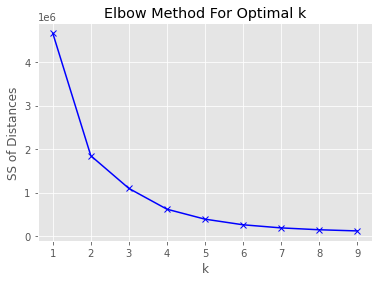

In [189]:
#Finding Best k using WSSE 
from sklearn.cluster import KMeans
SS_distances= []
I = range(1,10)
for i in I:
       k_means = KMeans(n_clusters=i)
       k_means= k_means.fit(df_numerical)
       SS_distances.append(k_means.inertia_)
   
centers = k_means.cluster_centers_

# plotting SSE distances (for each point to the nearest Center) versus number of k 
plt.plot(I, SS_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SS of Distances')
plt.title('Elbow Method For Optimal k')

### 3 is optimal number for clusters in numerical features 

In [190]:
k_means = KMeans(n_clusters=3)
k_means= k_means.fit(df_numerical)
labels = k_means.labels_
np.unique(labels, return_counts=True)

(array([0, 1, 2], dtype=int32), array([163234,  74335, 138296]))

### Plotting data 

### 1. 'Issue Time' with respect to the index

In [191]:
k_means.cluster_centers_

array([[12.67060068],
       [17.33080531],
       [ 8.84031158]])

### As it is only one feature, we introduce an index array for other axis. The values are hardcoded here

In [193]:
index_center = [[180000],[180000],[180000]]

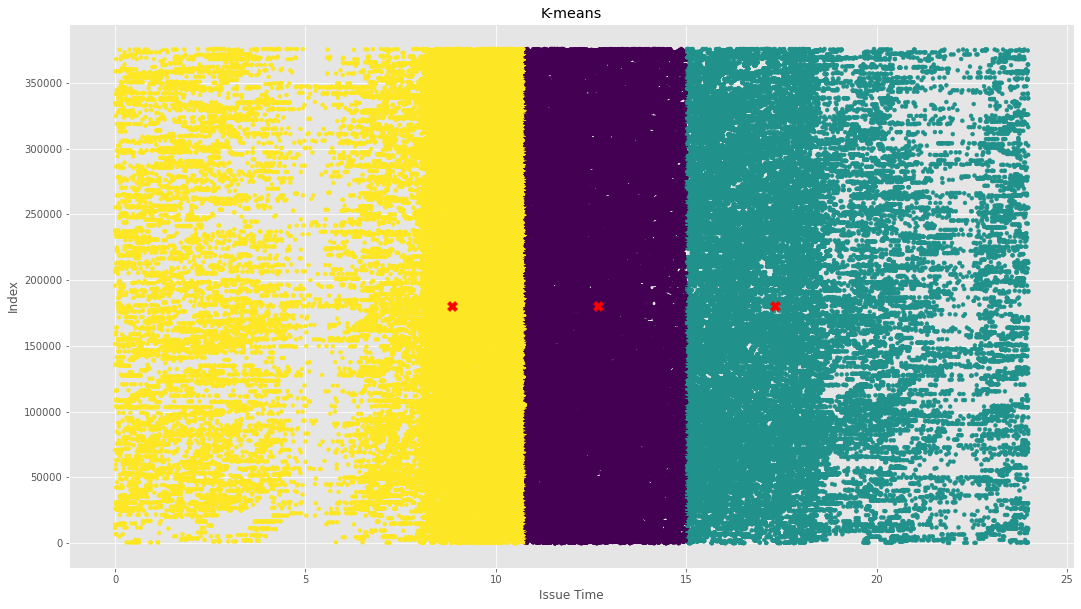

In [194]:
# Plot Clusters and their centers

label = k_means.labels_
centers = k_means.cluster_centers_

plt.figure(figsize=(18,10))
plt.scatter(df_numerical['Issue Time Decimal'],df.index,c=labels,s=15)
plt.scatter(centers[:,0], index_center, color ='red', marker='X', s=100) 
plt.xlabel('Issue Time')
plt.ylabel('Index')
plt.title('K-means')
plt.show()

## K MODES Clustering

In [126]:
# Import module for k-protoype cluster
from kmodes.kmodes import KModes

In [127]:
df_categorical.head()

,Make,Colour,Contravention Code,Location,PA_Details,Issue Date
162,audi,black,19,Antwerp Way,1500,Q1
163,audi,black,12,First Avenue,3254,Q1
164,audi,black,12,Ingestre Road,1498,Q1
165,audi,black,12,Lawrence Road E6,3299,Q1
166,audi,black,12,Napier Road E15,1434,Q1


### Elbow Method for optimal number of clusters

In [147]:
# Choosing optimal K
cost = []
for cluster in range(1, 10):
    try:
        kmodes = KModes(n_clusters = cluster)
        kmodes.fit_predict(df_categorical)
        cost.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(1, 10), 'Cost': cost})

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


In [148]:
# Import module for data visualization
from plotnine import *
import plotnine
# Data visualization with matplotlib
import matplotlib.pyplot as plt
# Use the theme of ggplot
plt.style.use('ggplot')

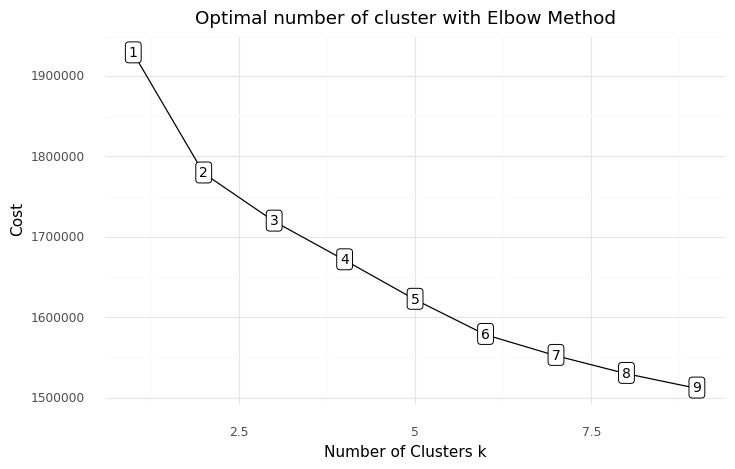

<ggplot: (8773825481161)>

In [149]:

# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

### Optimal number of clusters for Categorical data = 3

In [151]:
kmodes = KModes(n_clusters = 3)
kmodes.fit_predict(df_categorical)
cost=kmodes.cost_
labels_kmode = kmodes.labels_

In [152]:
labels_kmode

array([0, 0, 0, ..., 1, 1, 1], dtype=uint16)

In [153]:
np.unique(labels_kmode, return_counts = True)

(array([0, 1, 2], dtype=uint16), array([217419, 105257,  53189]))

In [154]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date
162,audi,black,9:31,19,Antwerp Way,1500,Q1
163,audi,black,10:30,12,First Avenue,3254,Q1
164,audi,black,10:30,12,Ingestre Road,1498,Q1
165,audi,black,10:30,12,Lawrence Road E6,3299,Q1
166,audi,black,10:30,12,Napier Road E15,1434,Q1


In [164]:
## Load Dataset
df_new = pd.read_csv('Processed.csv')
df_new.head()

,Unnamed: 0,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
0,162,audi,black,9:31,19,Antwerp Way,1500,Q1,9.52
1,163,audi,black,10:30,12,First Avenue,3254,Q1,10.50
2,164,audi,black,10:30,12,Ingestre Road,1498,Q1,10.50
3,165,audi,black,10:30,12,Lawrence Road E6,3299,Q1,10.50
4,166,audi,black,10:30,12,Napier Road E15,1434,Q1,10.50


### Adding cluster labels in the dataframe

In [195]:
df_new['clusters_k_means'] = labels

In [165]:

df_new['clusters_k_mode'] = labels_kmode
df_new.head()

,Unnamed: 0,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal,clusters_k_means,clusters_k_mode
0,162,audi,black,9:31,19,Antwerp Way,1500,Q1,9.52,3,0
1,163,audi,black,10:30,12,First Avenue,3254,Q1,10.50,3,0
2,164,audi,black,10:30,12,Ingestre Road,1498,Q1,10.50,3,0
3,165,audi,black,10:30,12,Lawrence Road E6,3299,Q1,10.50,3,0
4,166,audi,black,10:30,12,Napier Road E15,1434,Q1,10.50,3,0


In [166]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,clusters_k_means,clusters_k_mode
162,audi,black,9:31,19,Antwerp Way,1500,Q1,3,0
163,audi,black,10:30,12,First Avenue,3254,Q1,3,0
164,audi,black,10:30,12,Ingestre Road,1498,Q1,3,0
165,audi,black,10:30,12,Lawrence Road E6,3299,Q1,3,0
166,audi,black,10:30,12,Napier Road E15,1434,Q1,3,0


## K Prototype for complete dataset

In [167]:
from kmodes.kprototypes import KPrototypes

In [169]:
df_new.head()

,Unnamed: 0,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal,clusters_k_means,clusters_k_mode
0,162,audi,black,9:31,19,Antwerp Way,1500,Q1,9.52,3,0
1,163,audi,black,10:30,12,First Avenue,3254,Q1,10.50,3,0
2,164,audi,black,10:30,12,Ingestre Road,1498,Q1,10.50,3,0
3,165,audi,black,10:30,12,Lawrence Road E6,3299,Q1,10.50,3,0
4,166,audi,black,10:30,12,Napier Road E15,1434,Q1,10.50,3,0


- Keeping the original features of the dataset

In [170]:
df =df_new[['Make', 'Colour', 'Contravention Code', 'Location','PA_Details', 'Issue Date','Issue Time Decimal']]
df.head()

,Make,Colour,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
0,audi,black,19,Antwerp Way,1500,Q1,9.52
1,audi,black,12,First Avenue,3254,Q1,10.50
2,audi,black,12,Ingestre Road,1498,Q1,10.50
3,audi,black,12,Lawrence Road E6,3299,Q1,10.50
4,audi,black,12,Napier Road E15,1434,Q1,10.50


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375865 entries, 0 to 375864
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Make                375865 non-null  object 
 1   Colour              375865 non-null  object 
 2   Contravention Code  375865 non-null  object 
 3   Location            375865 non-null  object 
 4   PA_Details          375865 non-null  object 
 5   Issue Date          375865 non-null  object 
 6   Issue Time Decimal  375865 non-null  float64
dtypes: float64(1), object(6)
memory usage: 20.1+ MB


- Inspecting the categorical variables

In [172]:
# Inspect the categorical variables
df.select_dtypes('object').nunique()

Make                   129
Colour                  24
Contravention Code      81
Location              1631
PA_Details             250
Issue Date              12
dtype: int64

- Inspecting the Numerical variables

In [173]:
# Inspect the numerical variables
df.describe()

,Issue Time Decimal
count,375865.000000
mean,12.188128
std,3.521178
min,0.000000
25%,9.800000
50%,11.830000
75%,14.300000
max,23.980000


In [174]:
# Get the position of categorical columns
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Make', 'Colour', 'Contravention Code', 'Location', 'PA_Details', 'Issue Date']
Categorical columns position  : [0, 1, 2, 3, 4, 5]


In [175]:
# Convert dataframe to matrix
dfMatrix = df.to_numpy()
dfMatrix

array([['audi', 'black', '19', ..., '1500', 'Q1', 9.52],
       ['audi', 'black', '12', ..., '3254', 'Q1', 10.5],
       ['audi', 'black', '12', ..., '1498', 'Q1', 10.5],
       ...,
       ['yamaha', 'white', '81', ..., 'PN1458', 'Q12', 16.5],
       ['yamaha', 'white', '62', ..., '1475', 'Q12', 17.07],
       ['yamaha', 'white', '1', ..., '3237', 'Q12', 17.13]], dtype=object)

## K Prototype

In [176]:
kprototype = KPrototypes(n_clusters = 3)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)


array([1, 1, 1, ..., 0, 0, 0], dtype=uint16)

In [177]:
labels_kprototype = kprototype.labels_

### Adding cluster labels in the dataframe

In [178]:
df_new['clusters_k_prototype'] = labels_kprototype
df_new.head()

,Unnamed: 0,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal,clusters_k_means,clusters_k_mode,clusters_k_prototype
0,162,audi,black,9:31,19,Antwerp Way,1500,Q1,9.52,3,0,1
1,163,audi,black,10:30,12,First Avenue,3254,Q1,10.50,3,0,1
2,164,audi,black,10:30,12,Ingestre Road,1498,Q1,10.50,3,0,1
3,165,audi,black,10:30,12,Lawrence Road E6,3299,Q1,10.50,3,0,1
4,166,audi,black,10:30,12,Napier Road E15,1434,Q1,10.50,3,0,1


### Saving cluster lables to clustered_data.csv file.

In [198]:


df_new.rename(columns = {'Unnamed: 0':'Original_Index'}, inplace = True)
df_new.head()

,Original_Index,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal,clusters_k_means,clusters_k_mode,clusters_k_prototype
0,162,audi,black,9:31,19,Antwerp Way,1500,Q1,9.52,2,0,1
1,163,audi,black,10:30,12,First Avenue,3254,Q1,10.50,2,0,1
2,164,audi,black,10:30,12,Ingestre Road,1498,Q1,10.50,2,0,1
3,165,audi,black,10:30,12,Lawrence Road E6,3299,Q1,10.50,2,0,1
4,166,audi,black,10:30,12,Napier Road E15,1434,Q1,10.50,2,0,1


In [200]:
df_new.to_csv('clustered_data.csv')

In [201]:
np.unique(labels, return_counts = True)

(array([0, 1, 2], dtype=int32), array([163234,  74335, 138296]))

In [202]:
type(labels)

numpy.ndarray

### Visualising count of records in each cluster

- "Count of records in each cluster in Clustered data for Numerical Features"

Text(0.5, 1.0, 'Count of records in each cluster in Clustered data for Numerical Features')

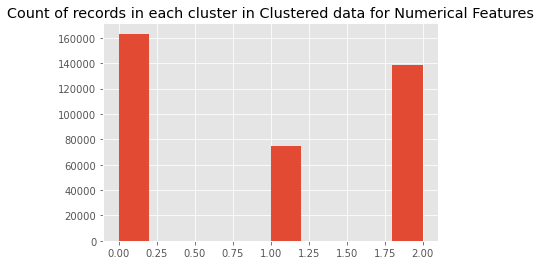

In [203]:
a = np.hstack(labels)
_ = plt.hist(a)  # arguments are passed to np.histogram
plt.title("Count of records in each cluster in Clustered data for Numerical Features")

In [204]:
np.unique(labels_kmode, return_counts = True)

(array([0, 1, 2], dtype=uint16), array([217419, 105257,  53189]))

- "Count of records in each cluster in Clustered data for Categorical Features"

Text(0.5, 1.0, 'Count of records in each cluster in Clustered data for Categorical Features')

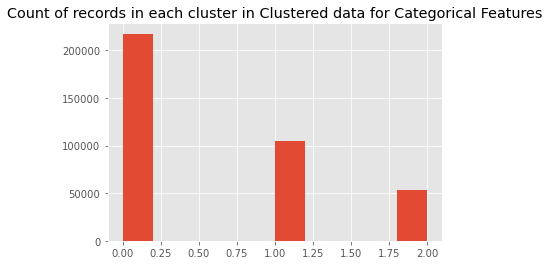

In [205]:
b = np.hstack(labels_kmode)
_ = plt.hist(b)  # arguments are passed to np.histogram
plt.title("Count of records in each cluster in Clustered data for Categorical Features")

In [206]:
np.unique(labels_kprototype, return_counts = True)

(array([0, 1, 2], dtype=uint16), array([ 74418, 138498, 162949]))

- "Count of records in each cluster in Clustered data for all Features"

Text(0.5, 1.0, 'Count of records in each cluster in Clustered data for all Features')

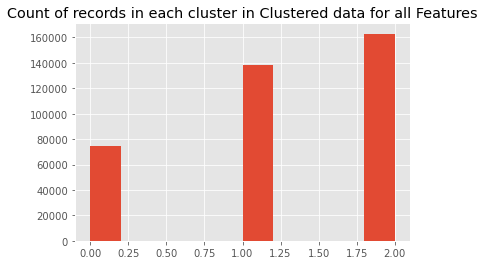

In [207]:
c= np.hstack(labels_kprototype)
_ = plt.hist(c)  # arguments are passed to np.histogram
plt.title("Count of records in each cluster in Clustered data for all Features")

## Evaluating clustering 
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [208]:
from sklearn.metrics.cluster import silhouette_score
print('silhouette_score:',metrics.silhouette_score(df_numerical, k_means.labels_))

silhouette_score: 0.528475761862039


Our silhouette_score is very close to 1 which indicates that our clusters are well apart from each other and clearly distinguished.

## K Prototype analysis on actual dates.

### Creating 3 dataframes for each cluster label in K prototype Method.

In [209]:
cluster1= df_new.loc[df_new['clusters_k_prototype'] == 0]
cluster2= df_new.loc[df_new['clusters_k_prototype'] == 1]
cluster3= df_new.loc[df_new['clusters_k_prototype'] == 2]
cluster1.shape,cluster2.shape,cluster3.shape

((74418, 12), (138498, 12), (162949, 12))

### Keeping original columns of the dataframe

In [210]:
cluster1 = cluster1.iloc[:,1:9]
cluster2 = cluster2.iloc[:,1:9]
cluster3 = cluster3.iloc[:,1:9]
cluster1.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
65,audi,black,15:04,27,Sibley Grove,1463,Q1,15.07
70,audi,black,15:05,19,St. Martins Avenue,1464,Q1,15.08
71,audi,black,15:06,1,Chant Street,1306,Q1,15.10
72,audi,black,15:06,21,Honour Lea Avenue,PN1306,Q1,15.10
73,audi,black,15:06,62,Warton Road,1433,Q1,15.10


In [211]:
df['Make'].value_counts(),df['Colour'].value_counts()

(ford          52143
 mercedes      46479
 bmw           40860
 vauxhall      36925
 volkswagen    36130
               ...  
 hino              1
 adly              1
 american          1
 dennis            1
 singer            1
 Name: Make, Length: 129, dtype: int64,
 black             84377
 white             68010
 silver            58613
 other             49848
 grey              41472
 blue              38762
 red               15147
 unspecified       11944
 green              3335
 yellow             1284
 brown               787
 gold                453
 orange              375
 purple              332
 maroon              308
 beige               271
 cream               234
 bronze              133
 burgundy            131
 pink                 26
 multi-coloured       10
 light blue            6
 mauve                 5
 turquoise             2
 Name: Colour, dtype: int64)

In [212]:
df['Make'].value_counts() 

ford          52143
mercedes      46479
bmw           40860
vauxhall      36925
volkswagen    36130
              ...  
hino              1
adly              1
american          1
dennis            1
singer            1
Name: Make, Length: 129, dtype: int64

### 1. Analysis - "Make" 

No clear grouping of feature 'Make' 

In [213]:
cluster1['Make'].value_counts()

mercedes      10317
ford           9021
bmw            8176
vauxhall       6951
volkswagen     6831
              ...  
malaguti          1
abarth            1
a c               1
maxus             1
adly              1
Name: Make, Length: 98, dtype: int64

In [214]:
cluster2['Make'].value_counts()

ford            19998
mercedes        17048
bmw             14990
vauxhall        13912
volkswagen      13453
                ...  
daimler             1
caterham            1
midas               1
mustang             1
austin rover        1
Name: Make, Length: 103, dtype: int64

In [215]:
cluster3['Make'].value_counts()

ford           23124
mercedes       19114
bmw            17694
vauxhall       16062
volkswagen     15846
               ...  
bugatti            1
moto morini        1
dennis             1
tata               1
eunos              1
Name: Make, Length: 109, dtype: int64

### 2. Analysis - "Colour" 

No clear grouping of feature 'Colour' 

In [216]:
cluster1['Colour'].value_counts()

black             16494
white             13371
silver            11963
other             10736
grey               8058
blue               7028
red                2954
unspecified        2479
green               571
yellow              207
brown               120
orange               82
maroon               68
beige                61
purple               58
gold                 56
cream                52
bronze               26
burgundy             23
pink                  5
multi-coloured        3
mauve                 2
light blue            1
Name: Colour, dtype: int64

In [217]:
cluster2['Colour'].value_counts()

black             30161
white             25105
other             20689
silver            20451
grey              14672
blue              13760
unspecified        5438
red                5424
green              1216
yellow              549
brown               273
gold                173
purple              123
orange              119
maroon              101
cream                82
beige                77
bronze               41
burgundy             32
pink                  9
multi-coloured        2
light blue            1
Name: Colour, dtype: int64

In [218]:
cluster3['Colour'].value_counts()

black             37722
white             29534
silver            26199
grey              18742
other             18423
blue              17974
red                6769
unspecified        4027
green              1548
yellow              528
brown               394
gold                224
orange              174
purple              151
maroon              139
beige               133
cream               100
burgundy             76
bronze               66
pink                 12
multi-coloured        5
light blue            4
mauve                 3
turquoise             2
Name: Colour, dtype: int64

### 3. Analysis - "Issue Time" 

No clear grouping of feature 'Issue Time' 

In [223]:
df['Issue Time Decimal'].value_counts()

9.32    895
9.17    877
9.42    871
9.30    870
9.35    865
       ... 
5.07      2
5.42      2
5.03      1
5.33      1
5.32      1
Name: Issue Time Decimal, Length: 1438, dtype: int64

From the count of fines in the original dataset, the frequency of fines is high in the office hours i.e. **8am to 5pm.**

- Most number of fines are in the morning hours of 8:00am and 9:00am.

- The least number of fines are in the early morning i.e. 4:00 am and 5:00 am

In [224]:
cluster1['Issue Time'].value_counts()

15:24    400
15:12    397
15:23    390
15:35    383
15:47    381
        ... 
22:23      5
14:36      2
14:27      1
14:37      1
14:29      1
Name: Issue Time, Length: 566, dtype: int64

- Cluster 1 consists of more fines of morning i.e. 8:00 am

- The least number of fines are in the early morning i.e. 4:00 am and 5:00 am

In [225]:
cluster2['Issue Time'].value_counts()

9:19     895
9:10     877
9:25     871
9:18     870
9:21     865
        ... 
11:09      1
11:08      1
11:11      1
11:06      1
11:02      1
Name: Issue Time, Length: 667, dtype: int64

- Cluster 2 consists of more fines of morning i.e. 9:00 am

- The least number of fines are in the early morning i.e. 4:00 am and 5:00 am

In [226]:
cluster3['Issue Time'].value_counts()

11:42    842
11:49    841
11:35    839
11:28    832
11:17    829
        ... 
10:27      1
10:26      1
15:29      1
10:32      1
10:29      1
Name: Issue Time, Length: 304, dtype: int64

- Cluster 3 consists of more fines of morning i.e. 9:00 am

- The least number of fines are in the early morning i.e. 4:00 am and 3:00 am

### 4. Analysis - "Contravention Code" 

No clear grouping of feature 'Contravention Code' 


In [227]:
df['Contravention Code'].value_counts()

12     132484
1       85529
19      36411
62      18952
30      18084
        ...  
71          1
23p         1
5u)         1
23r         1
57          1
Name: Contravention Code, Length: 81, dtype: int64

From the count of fines in the original dataset, the frequency of fines is high with 
**Contravention Code : 12- 132490**
**Contravention Code : 1 - 92937**

- Most number of fines are with **Contravention Code : 12** i.e 132490

- The least number of fines are with **Contravention Codes : 7,4,71,57**  - 1 each

In [228]:
cluster1['Contravention Code'].value_counts()

1      24244
12     18250
62      5379
19      4680
165     3211
       ...  
56         1
89         1
5u)        1
18         1
232        1
Name: Contravention Code, Length: 63, dtype: int64

In [229]:
cluster2['Contravention Code'].value_counts()

12     53100
1      28302
19     14125
25      7978
62      6761
       ...  
18         1
56         1
23e        1
7          1
232        1
Name: Contravention Code, Length: 67, dtype: int64

In [230]:
cluster3['Contravention Code'].value_counts()

12      61134
1       32983
19      17606
30      10990
62       6812
        ...  
4           1
89          1
61g)        1
23r         1
164         1
Name: Contravention Code, Length: 71, dtype: int64

### 5. Analysis - "Location" 

**Cluster 1 consists of most of the fines occured at following locations:** 
- Oxford Road            952
- Westfield Avenue       810
- Clova Road             633

**Cluster 2 consists of most of the fines occured at following locations:**

- High Street North    4576
- Barking Road         3397
- Westfield Avenue     2665

**Cluster 3 consists of most of the fines occured at following locations:**
- High Street North    2946
- Thorpe Road          1870
- St. Johns Road E6    1162
- Romford Road         1090

In [231]:
df['Location'].value_counts()

High Street North    7836
Barking Road         4587
Thorpe Road          4049
Kempton Road         3770
Westfield Avenue     3688
                     ... 
Neville Road E13        1
McDowall Close          1
Walton Road, E6         1
Grebe Close             1
Phoebe Walk             1
Name: Location, Length: 1631, dtype: int64

From the count of fines in the original dataset, the frequency of fines is high at following location

**High Street North : 7837 fines**

**Barking Road : 4585**

In [232]:
cluster1['Location'].value_counts()

High Street North     2418
Westfield Avenue      1930
Barking Road          1392
Oxford Road           1052
Kempton Road           981
                      ... 
Sophia Road              1
Capulet Mews             1
Paul Robeson Close       1
Ben Tillett Close        1
Lester Avenue            1
Name: Location, Length: 1390, dtype: int64

In [233]:
cluster2['Location'].value_counts()

High Street North                                     1613
Stephenson Street                                     1483
Barking Road                                          1422
Thorpe Road                                           1356
Liberty Bridge Road                                   1337
                                                      ... 
Abbey Road - Parking Area Fronting Brassett Point_       1
Greenwich Crescent                                       1
Kay Street                                               1
Allhallows Road                                          1
Phoebe Walk                                              1
Name: Location, Length: 1528, dtype: int64

In [234]:
cluster3['Location'].value_counts()

High Street North          3805
Madge Gill Way Car Park    1842
Thorpe Road                1837
Skeffington Road           1829
Kempton Road               1811
                           ... 
A1 - Manor Park               1
Wakefield Road                1
Temple Mill Lane              1
Priory Court                  1
Royal Albert Way              1
Name: Location, Length: 1586, dtype: int64

### 6. Analysis - "PA_Details" 

We have observed a very clear segregation of clusters on the basis of PA_Details. Fines carried by similar PAs are grouped in similar cluster. 

**Cluster 1 consists of most of the fines  by following PA_Details:** 

**PA_Details : Frequency** 
- 1142:   6729
- 1313:    6518
- 1331:    6417
- 1306:    6195
- 1278:    5396
- 1252:    4979
- 1281:    4019
- 1145:    4010

**Cluster 2 consists of most of the fines by following PA_Details:**

**PA_Details : Frequency** 
- 1468:    10708
- 1466:     9820
- 1456:     9766
- 1453:     9671
- 1419:     9307

**Cluster 3 consists of most of the fines by following PA_Details:**

**PA_Details : Frequency** 
- 3247:    5971
- 3235:    4602
- 3266:    4564
- 3216:    3442
- 3264:    3019

In [235]:
df['PA_Details'].value_counts()

1468      8217
1453      8063
1466      7604
1456      7336
1519      7293
          ... 
PN3165       1
PN1460       1
PN3197       1
3290         1
PN3291       1
Name: PA_Details, Length: 250, dtype: int64

In [236]:
cluster1['PA_Details'].value_counts()

1456      3188
1464      2807
1306      2227
1313      2012
1410      1961
          ... 
1501         1
1035         1
PN1308       1
3290         1
PN3291       1
Name: PA_Details, Length: 240, dtype: int64

In [237]:
cluster2['PA_Details'].value_counts()

1331      4409
1468      3860
1419      3485
1387      3434
1485      2895
          ... 
PN1430       3
PN1440       1
PN1483       1
3327         1
PN1309       1
Name: PA_Details, Length: 231, dtype: int64

In [238]:
cluster3['PA_Details'].value_counts()

1453         5039
1519         3830
1410         3660
1468         3584
1466         3535
             ... 
999999999       1
1430            1
PN3165          1
PN3197          1
PN1440          1
Name: PA_Details, Length: 244, dtype: int64

### 7. Analysis - "Issue Date" (quarters)


No clear grouping of feature "Issue Date" (quarters)

In [239]:
df['Issue Date'].value_counts()

Q4     41744
Q3     39500
Q2     38200
Q5     37074
Q1     34230
Q12    34063
Q10    32739
Q11    32391
Q8     25898
Q9     25229
Q7     20621
Q6     14176
Name: Issue Date, dtype: int64

In [240]:
cluster1['Issue Date'].value_counts()

Q4     9861
Q5     7967
Q2     7685
Q12    7615
Q3     7151
Q10    6117
Q9     5205
Q7     5197
Q11    5159
Q8     5059
Q1     4974
Q6     2428
Name: Issue Date, dtype: int64

In [241]:
cluster2['Issue Date'].value_counts()

Q4     18261
Q3     15110
Q5     14583
Q1     13203
Q11    12945
Q12    11865
Q10    11808
Q2     11060
Q8      9339
Q9      8860
Q7      6449
Q6      5015
Name: Issue Date, dtype: int64

In [242]:
cluster3['Issue Date'].value_counts()

Q2     19455
Q3     17239
Q1     16053
Q10    14814
Q12    14583
Q5     14524
Q11    14287
Q4     13622
Q8     11500
Q9     11164
Q7      8975
Q6      6733
Name: Issue Date, dtype: int64

## Conclusion

### Interesting Observations: 
- **Issue Time** The frequency of fines is high in the office hours i.e. **8am to 5pm.**
   - Most number of fines are in the morning hours of 8:00am and 9:00am.
   - The least number of fines are in the early morning i.e. 4:00 am and 5:00 am.
 
- Cluster 1 consists of most of the fines from 8:00 am where Cluster 2 and 3 have most fines from 9:00am

----------------

- **Contravention Code** - From the count of fines in the original dataset, the frequency of fines is high with 
**Contravention Code : 12- 132490**
**Contravention Code : 1 - 92937**

  - Most number of fines are with **Contravention Code : 12** i.e 132490

  - The least number of fines are with **Contravention Codes : 7,4,71,57**  - 1 each

----------------

- **Location** - Most of the fines are conducted at following streets.
  
   - High Street North    7837

   - Barking Road         4585

   - Thorpe Road          4049

---------------
- **Issue Date** - 
  - Most of the fines are observed on start of year after New Year's eve. i.e. 2-Jan-2020    : 937



---------------- 
----------------
----------------

## Cluster Analysis

**We have observed a very clear segregation of clusters on the basis of PA_Details. Fines carried by similar PAs are grouped in similar cluster.**

After PA_Details, Location has played an important role in forming the clusters. 